[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shakilsustswe/Machine-Learning-Assignment/blob/master/Ml%20Lab%20Final/Build%20a%20model%20using%20Logistic%20Regression.ipynb)

**Problem statement**

A banking institution wants to develop a model that predicts whether a customer will subscribe to a term deposit or not based on their banking behaviour. They have collected a dataset of past customers with information about their demographics, account details, and whether they subscribed to a term deposit or not. The bank wants to build a model using Logistic Regression to predict whether a new customer will subscribe to a term deposit or not based on their banking behaviour.
The dataset used for this problem statement is the "Bank Marketing Data Set" which contains information on customers of a bank. The dataset includes 17 attributes such as customer demographics, account details, and whether the customer subscribed to a term deposit or not. Each customer is classified as either yes or no based on whether they subscribed to a term deposit or not.

Dataset: https://drive.google.com/file/d/18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ/view?usp=sharing


# Libraries

In [ ]:
#Import Libraries
#Md Sabit Islam Bhuiya
#2018831061
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Data Load

In [ ]:
#Drive mount
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Assignment/bank-data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Data Pre-Processing

In [ ]:
#data shape
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 11162
Total Number of columns : 17


In [ ]:
#data columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
#Class Distribution
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [ ]:
#Normalizing the frequency table of 'Deposit' variable
df['deposit'].value_counts(normalize=True)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

In [ ]:
#null value check
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Shuffle the data
df=df.sample(frac=1).reset_index(drop=True)

In [ ]:
#view the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,39,technician,married,secondary,no,3494,yes,no,cellular,19,nov,139,1,92,4,failure,no
1,30,technician,single,secondary,no,281,no,no,cellular,12,aug,105,2,-1,0,unknown,no
2,46,blue-collar,married,secondary,no,640,yes,no,cellular,6,may,246,1,55,5,success,yes
3,27,blue-collar,single,tertiary,no,644,no,no,cellular,2,jun,657,1,182,1,success,yes
4,49,management,married,tertiary,no,3842,no,no,cellular,5,apr,163,1,186,3,failure,no


In [ ]:
#columns data type
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

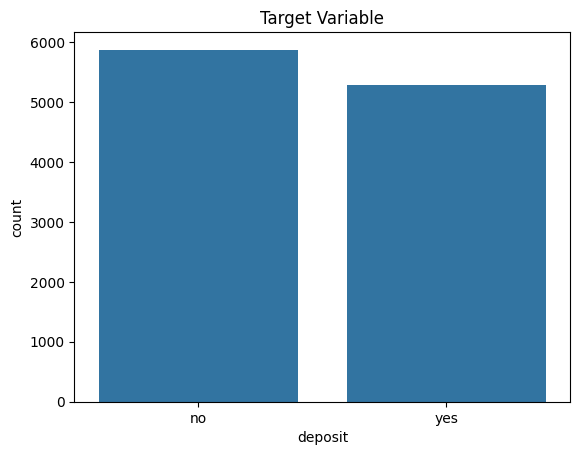

In [ ]:
#Class Distribution
sns.countplot(x="deposit", data=df)
plt.title("Target Variable")
plt.show()

In [ ]:
#Scale numeric data

from sklearn.preprocessing import StandardScaler

# Copy original dataframe
df_copy = df.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])

df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,-0.187357,technician,married,secondary,no,0.609395,yes,no,cellular,0.396891,nov,139,-0.554168,0.373962,1.382014,failure,no
1,-0.942844,technician,single,secondary,no,-0.386801,no,no,cellular,-0.434427,aug,105,-0.186785,-0.481184,-0.363260,unknown,no
2,0.400245,blue-collar,married,secondary,no,-0.275493,yes,no,cellular,-1.146986,may,246,-0.554168,0.033742,1.818332,success,yes
3,-1.194673,blue-collar,single,tertiary,no,-0.274253,no,no,cellular,-1.622025,jun,657,-0.554168,1.201522,0.073059,success,yes
4,0.652074,management,married,tertiary,no,0.717293,no,no,cellular,-1.265746,apr,163,-0.554168,1.238302,0.945695,failure,no


In [ ]:
#Encode Categorical Value

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_copy[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

# Replace Categotical Data with Encoded Data
df_copy = df_copy.drop(cat_cols ,axis=1)
df_copy = pd.concat([df_encoded, df_copy], axis=1)

# Encode target value
df_copy['deposit'] = df_copy['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', df_copy.shape)
df_copy.head()

Shape of dataframe: (11162, 52)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-0.187357,0.609395,0.396891,139,-0.554168,0.373962,1.382014,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-0.942844,-0.386801,-0.434427,105,-0.186785,-0.481184,-0.363260,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.400245,-0.275493,-1.146986,246,-0.554168,0.033742,1.818332,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.194673,-0.274253,-1.622025,657,-0.554168,1.201522,0.073059,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.652074,0.717293,-1.265746,163,-0.554168,1.238302,0.945695,0


# Split Dataset for Training and Testing

In [ ]:

# Select Features
feature = df_copy.drop('deposit', axis=1)

# Select Target
target = df_copy['deposit']

# Set Training and Testing Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature , target, shuffle = True, test_size=0.2, random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8929, 51)
Shape of testing feature: (2233, 51)
Shape of training label: (8929,)
Shape of training label: (2233,)


# Standardize the Features

In [ ]:

# Show the Training and Testing Data
# print('Shape of training feature:', X_train.shape)
# print('Shape of testing feature:', X_test.shape)
# print('Shape of training label:', y_train.shape)
# print('Shape of training label:', y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling

In [ ]:
#sklearn LogisticRegression library
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
#Predictions and Evaluation
y_pred = model.predict(X_test_scaled)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8262427227944469


# Evaluation

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1211
           1       0.82      0.79      0.81      1022

    accuracy                           0.83      2233
   macro avg       0.83      0.82      0.82      2233
weighted avg       0.83      0.83      0.83      2233



Confusion Matrix:
 [[1038  173]
 [ 215  807]]


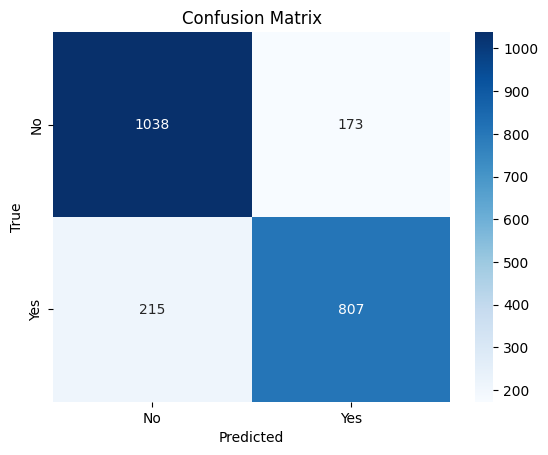

In [ ]:
# Confusion Matrix

conf_m = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_m)

sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()